In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
#read training data 
PATH = '/root/data/data_train.csv'

raw_train_data = pd.read_csv(PATH)
print(raw_train_data.head())

   id  num1  num2  num3  num4  num5  num6  num7  num8  num9   ...    cat6  \
0   0     2     5     0     1     0     0     0     0     0   ...     NaN   
1   1     1     7     0     0     1     0     0     0     0   ...     NaN   
2   2     5     9     0     0     1     0     0     0     0   ...     NaN   
3   3     0     2     1     0     0     0     0     0     0   ...     0.0   
4   4     0     0     1     0     0     0     0     0     0   ...     NaN   

   cat7  cat8  cat9  cat10  cat11  cat12  cat13  cat14  target  
0     0   1.0     4    1.0      0    0.0      1     12       0  
1     0   NaN    11    1.0      1    2.0      1     19       0  
2     0   NaN    14    1.0      1    2.0      1     60       0  
3     0   1.0    11    1.0      1    3.0      1    104       0  
4     0   NaN    14    1.0      1    2.0      1     82       0  

[5 rows x 58 columns]


In [21]:
#read test data
PATH = '/root/data/data_test.csv'

raw_test_data = pd.read_csv(PATH)
print(raw_test_data.shape)
num_test,_ = raw_test_data.shape
#store test data id
test_id = raw_test_data['id'].values
print(raw_test_data.head(10))

(892816, 57)
   id  num1  num2  num3  num4  num5  num6  num7  num8  num9  ...    cat5  \
0   0     0     8     0     1     0     0     0     0     0  ...     1.0   
1   1     4     5     0     0     0     1     0     0     0  ...     1.0   
2   2     5     3     0     0     0     1     0     0     0  ...     1.0   
3   3     0     6     1     0     0     0     0     0     0  ...     1.0   
4   4     5     7     0     0     0     1     0     0     0  ...     1.0   
5   5     0     6     1     0     0     0     0     0     0  ...     1.0   
6   6     0     3     0     1     0     0     0     0     0  ...     1.0   
7   8     0     0     1     0     0     0     0     0     0  ...     1.0   
8  10     0     7     0     1     0     0     0     0     0  ...     0.0   
9  11     1     6     0     0     0     1     0     0     0  ...     0.0   

   cat6  cat7  cat8  cat9  cat10  cat11  cat12  cat13  cat14  
0   NaN     0   NaN     1    1.0      1    2.0      1     65  
1   NaN     0   0.0    1

In [6]:
#counting total na values in each column
total_na = raw_train_data.isna().sum()
print(total_na)

id             0
num1           0
num2           0
num3           0
num4           0
num5           0
num6           0
num7           0
num8           0
num9           0
num10          0
num11          0
num12          0
num13          0
num14          0
num15          0
num16          0
num17          0
num18     107909
num19          5
num20          1
num21          0
num22      42667
num23          0
der1           0
der2           0
der3           0
der4           0
der5           0
der6           0
der7           0
der8           0
der9           0
der10          0
der11          0
der12          0
der13          0
der14          0
der15          0
der16          0
der17          0
der18          0
der19          0
cat1         217
cat2          83
cat3        5814
cat4         107
cat5           5
cat6      411792
cat7           0
cat8      266928
cat9           0
cat10      11503
cat11          0
cat12        570
cat13          0
cat14          0
target         0
dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


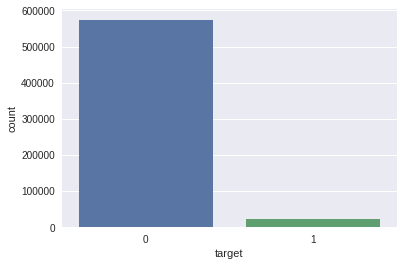

In [22]:
sns.countplot("target",data=raw_train_data)

In [23]:
#As number of labels belonging to class 1 is very less so we will use oversampling
index = list(raw_train_data[raw_train_data['target']==1].index)
class1_data = raw_train_data.iloc[index]
lst = [class1_data] * 10
class1_data = pd.concat(lst)
lst = [raw_train_data,class1_data]
raw_train_data = pd.concat(lst)
num_training,_=raw_train_data.shape
print(raw_train_data.shape)


(813160, 58)


**Data Preprocessing**



1.   Replace missing values in numerical variables by mean
2.   Replace missing values in categorical variables by creating new category.

1.  Convert all numerical values between 0 and  1

1.   Convert all categorical values into label encoding and one hot encoding
















In [0]:


def one_hot_encoding(data,column_names):
  
  data = pd.get_dummies(data , columns = column_names , prefix = column_names)
  return data  


def normalize_values(data,column_names):
  num_min = data[column_names].min()
  num_max = data[column_names].max()
  
  norm_val = num_max - num_min
  data[column_names] = (data[column_names] - num_min) / norm_val
  
  return data


def preprocess_data(data):
  
  column_names = list(data.columns.values)
  num_columns = column_names[1:24]
  #der_columns = column_names[24:43]
  der_numerical_columns = column_names[24:27]
  der_categorical_columns = column_names[27:43]
  cat_columns = column_names[43:]
  
  #handling missing values in numerical variables 
  data[num_columns] = data[num_columns].fillna(data[num_columns].mean())
  
  
  #drop some columns 
  drop_columns = ['cat6','cat8']
  
  cat_columns.remove('cat6')
  cat_columns.remove('cat8')
  
  data = data.drop(columns = drop_columns)
  
  #handling missing values in categorical variables 
  data[cat_columns] = data[cat_columns].fillna("NA")
  
  #label encoding 
  cat_datatype_columns = data.select_dtypes(['object']).columns
  
  for column in cat_datatype_columns:
    data[column] = data[column].astype('category')
    
  data[cat_datatype_columns] = data[cat_datatype_columns].apply(lambda x:x.cat.codes)
  
  #one hot encoding
  data = one_hot_encoding(data,der_categorical_columns)
  data = one_hot_encoding(data,cat_columns)
  
  
  #normalize numerical values
  data = normalize_values(data,num_columns)
  #data = normalize_values(data,der_columns)
  
  return data

In [14]:
#seperate out the target values from the training data
target = raw_train_data['target'].values
raw_train_data = raw_train_data.drop(columns = ['target'])
num_training,_ = raw_train_data.shape
print(raw_train_data.shape)

(813160, 57)


In [15]:
#combining train and test data to preprocess
data = [raw_train_data , raw_test_data]
data = pd.concat(data)
print(data.shape)

(1705976, 57)


In [0]:
#preprocess data
prep_data = preprocess_data(data)

In [11]:
print(prep_data.shape)
#dividing into train and test
prep_train_data = prep_data[:num_training]
prep_test_data = prep_data[num_training:num_training + num_test]
print(prep_train_data.shape)
print(prep_test_data.shape)

(1705976, 369)
(813160, 369)
(892816, 369)


In [14]:
print(prep_train_data.head())

   id      num1      num2  num3  num4  num5  num6  num7  num8  num9  \
0   0  0.285714  0.454545   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
1   1  0.142857  0.636364   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
2   2  0.714286  0.818182   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
3   3  0.000000  0.181818   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   4  0.000000  0.000000   1.0   0.0   0.0   0.0   0.0   0.0   0.0   

     ...      cat14_95  cat14_96  cat14_97  cat14_98  cat14_99  cat14_100  \
0    ...             0         0         0         0         0          0   
1    ...             0         0         0         0         0          0   
2    ...             0         0         0         0         0          0   
3    ...             0         0         0         0         0          0   
4    ...             0         0         0         0         0          0   

   cat14_101  cat14_102  cat14_103  cat14_104  
0          0          0          0          0  
1          0  

In [0]:
#Define training and validation size

n_training = 717160
n_validation = 96000
n_test = 892816


    
#Divide data into training set and validation set

# removing id column
def get_train_test_data(prep_train_data,target,prep_test_data):
  prep_train_data = prep_train_data.drop(columns = ['id'])
  prep_test_data = prep_test_data.drop(columns = ['id'])
  y_train = target
  x_train = prep_train_data.values
  N,M = x_train.shape
  indices = np.arange(N)
  np.random.shuffle(indices)
  x_train = x_train[indices]
  y_train = y_train[indices]


  x_val = x_train[:n_validation]
  y_val = y_train[:n_validation]
  val_set = (x_val,y_val)


  x_train = x_train[n_validation:n_validation+n_training]
  y_train = y_train[n_validation:n_validation+n_training]
  train_set = (x_train,y_train)
  
  print(x_train.shape)
  print(y_train.shape)
  print(x_val.shape)
  print(y_val.shape)
  
  #including a random y_test so iterator is compatible
  y_test = np.zeros((100000),dtype=int)
  x_test = prep_test_data.values
  x_test = x_test[:100000]
  return train_set,val_set,(x_test,y_test)
  

class Model():
  def __init__(self):
    self.lrate = 0.005
    self.batch_size = 64 
    self.ntrain = 717160
    self.nclasses = 2
    self.ntest = 892816
    self.training =True
    self.keep_prob = tf.constant(0.90)
    self.hidden_size = 128
    
  def get_data(self,prep_train_data,target,prep_test_data):
    with tf.name_scope('data'):
      # Create dataset and iterator
      train,val,test = get_train_test_data(prep_train_data,target,prep_test_data)
      
      train_data = tf.data.Dataset.from_tensor_slices(train)
      train_data = train_data.shuffle(100000)
      train_data = train_data.batch(self.batch_size)

      val_data = tf.data.Dataset.from_tensor_slices(val)
      val_data = val_data.batch(self.batch_size)


      test_data = tf.data.Dataset.from_tensor_slices(test)
      test_data = test_data.batch(self.batch_size)

      iterator = tf.data.Iterator.from_structure(train_data.output_types,
                                                train_data.output_shapes)
      
      X , label = iterator.get_next()
      _,self.m = X.shape
      self.X = tf.cast(X,dtype=tf.float32)
      self.label = tf.one_hot(label,self.nclasses)

      self.train_init = iterator.make_initializer(train_data)
      self.val_init = iterator.make_initializer(val_data)
      self.test_init = iterator.make_initializer(test_data)
      

  def inference(self):
    with tf.variable_scope('logreg',reuse=tf.AUTO_REUSE) as scope:
      # Create weights and bias
      # w is initialized to random variables with mean 0 and stddev 0.01 
      # b is initialized to zero
      w = tf.get_variable(name='weights',dtype=tf.float32,shape=[32,self.nclasses],
                          initializer = tf.random_normal_initializer(0 , 0.01))
      b = tf.get_variable(name='bias',shape=[self.nclasses],
                         initializer = tf.zeros_initializer())

      # build model 
      # the model that returns logits
      layer1 = tf.layers.dense(self.X,128,activation=tf.nn.relu,
                               kernel_initializer=tf.random_normal_initializer(0,0.01),
                               name='dense_layer1')
      #dropout1 = tf.nn.dropout(layer1,self.keep_prob,name='dropout1')
      
      layer2 = tf.layers.dense(layer1,64,activation=tf.nn.relu,
                               kernel_initializer = tf.random_normal_initializer(0,0.01),
                               name='dense_layer2')
      #dropout2 = tf.nn.dropout(layer2,self.keep_prob,name='dropout2')
      
      layer3 = tf.layers.dense(layer2,64,activation=tf.nn.relu,
                               kernel_initializer = tf.random_normal_initializer(0,0.01),
                               name='dense_layer3')
      
      layer4 = tf.layers.dense(layer3,32,activation=tf.nn.relu,
                               kernel_initializer = tf.random_normal_initializer(0,0.01),
                               name='dense_layer4')
      
      self.logits = tf.matmul(layer4,w) + b

  def create_loss(self):
    with tf.name_scope('loss'):
      # define loss function
      entropy = tf.nn.softmax_cross_entropy_with_logits(logits = self.logits , labels = self.label)
      self.loss = tf.reduce_mean(entropy,name='loss')
      
  def create_optimizer(self):
    with tf.name_scope('optimizer'):      
      # define training op 
      self.optimizer = tf.train.AdamOptimizer(self.lrate).minimize(self.loss)

  def eval_model(self):
    with tf.name_scope('eval'):      
      # calculate accuracy 
      self.preds = tf.nn.softmax(self.logits)
      self.predicted_labels = tf.argmax(self.preds,1)
      correct_preds = tf.equal(tf.argmax(self.preds,1),tf.argmax(self.label,1))
      self.accuracy = tf.reduce_sum(tf.cast(correct_preds,dtype=tf.float32))

  def build_model(self,prep_train_data,target,prep_test_data):
    self.get_data(prep_train_data,target,prep_test_data)
    self.inference()
    self.create_loss()
    self.create_optimizer()
    self.eval_model()
    
  def train(self,n_epochs):
    # start training loop 
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
      sess.run(init)
      for epoch in range(n_epochs):
        sess.run(self.train_init)
        total_loss = 0.0
        n_batches = 0
        step = 0
        train_acc = 0
        
        try:
          while True:
            _,batch_loss,acc = sess.run([self.optimizer,self.loss,self.accuracy])
            total_loss += batch_loss
            train_acc += acc
            n_batches += 1
            step += 1
            if step%100 == 0:
              print('Step {} : Loss {}'.format(step,batch_loss))
        
        except tf.errors.OutOfRangeError:
          pass
        print('Average loss at epoch {} is {}'.format(epoch,total_loss/n_batches))
        print('Average train accuracy at epoch {} is {}'.format(epoch,train_acc/self.ntrain))
      
      #calculate validation set accuracy
      sess.run(self.val_init)
      total_acc = 0
      val_pred = []
      try:
        while True:
          acc,pred = sess.run([self.accuracy,self.predicted_labels])
          total_acc += acc
          val_pred.append(pred)
      except tf.errors.OutOfRangeError:
        pass
      print('Average Validation accuracy {}'.format(total_acc / 96000))
      
      #calculate test set predictions
      test_pred = []
      
      sess.run(self.test_init)
      self.training = False
      try:
        while True:
          pred = sess.run(self.predicted_labels)
          test_pred.append(pred)
      except tf.errors.OutOfRangeError:
        pass
    
    
    return val_pred,test_pred
       
      




In [0]:

#Build Model
model = Model()
model.build_model(prep_train_data,target,prep_test_data)


(717160, 368)
(717160,)
(96000, 368)
(96000,)


In [19]:
predictions = model.train(20)

Step 100 : Loss 0.6424429416656494
Step 200 : Loss 0.6326107978820801
Step 300 : Loss 0.6020940542221069
Step 400 : Loss 0.569532036781311
Step 500 : Loss 0.5899226665496826
Step 600 : Loss 0.6144356727600098
Step 700 : Loss 0.6213679313659668
Step 800 : Loss 0.5956388711929321
Step 900 : Loss 0.590300440788269
Step 1000 : Loss 0.6186176538467407
Step 1100 : Loss 0.5893237590789795
Step 1200 : Loss 0.5631606578826904
Step 1300 : Loss 0.570693850517273
Step 1400 : Loss 0.615501880645752
Step 1500 : Loss 0.580223560333252
Step 1600 : Loss 0.6161344051361084
Step 1700 : Loss 0.5393094420433044
Step 1800 : Loss 0.6201529502868652
Step 1900 : Loss 0.6208126544952393
Step 2000 : Loss 0.6059439182281494
Step 2100 : Loss 0.6077674031257629
Step 2200 : Loss 0.5789238810539246
Step 2300 : Loss 0.5658040046691895
Step 2400 : Loss 0.5295243263244629
Step 2500 : Loss 0.5890027284622192
Step 2600 : Loss 0.5827115178108215
Step 2700 : Loss 0.6104682683944702
Step 2800 : Loss 0.5885738730430603
Step 2